In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd/users/prave/datasets/csv files/ted talks

C:\users\prave\datasets\csv files\ted talks


In [3]:
month_order=['jan','feb','mar','apr','may','jun','jul','sug','sep','oct','nov','dec']
day_order=['mon','tue','wed','thu','fri','sat','sun']

In [4]:
df=pd.read_csv('ted_main.csv')
df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [5]:
df=df[['name','title','description','main_speaker','speaker_occupation','num_speaker','duration','event','film_date',
      'published_date','comments','tags','languages','ratings','related_talks','url','views']]

In [6]:
df.head(2)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520


Before going to further,let us convert the Unix timestamp into a human readable format

In [7]:
import datetime
df['film_date']=df['film_date'].apply(lambda x:datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))
df['published_date']=df['published_date'].apply(lambda x:datetime.datetime.fromtimestamp(int(x)).strftime('%d-%m-%Y'))

In [8]:
df.head(3)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292


# Most Viewed Talks of All Time

In [9]:
popu_talks=df[['title','main_speaker','views','film_date']].sort_values('views',ascending=False)[:15]
popu_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,25-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,26-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,17-09-2009
837,The power of vulnerability,Brené Brown,31168150,06-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,06-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,10-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,27-02-2008
5,Why we do what we do,Tony Robbins,20685401,02-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,08-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,27-10-2012


Observations:            
* Ken Robison's talk s on DO Schools Kills Creatiity? is the most popular talk of all time with 47.2 million views.              * Also coincidently,it is also one of the first ener uploaded on the TED site.           
* Robinson's talk is closely follewed by Army Cuddy talk on Your Body Language May Shape Who You Are.        
* there are only two talk that have surpassed the 40 million c=views and 4 have crossed the 30 million views

<AxesSubplot:xlabel='abbr', ylabel='views'>

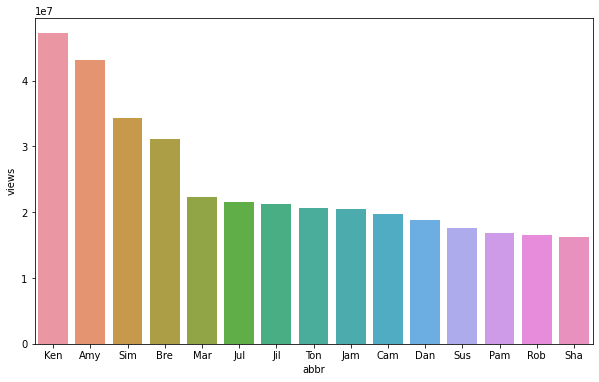

In [10]:
popu_talks['abbr']=popu_talks['main_speaker'].apply(lambda x:x[:3])
plt.figure(figsize=[10,6])
sns.barplot(x='abbr',y='views',data=popu_talks)

<AxesSubplot:xlabel='views', ylabel='Density'>

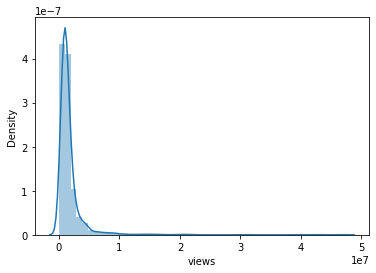

In [11]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(df['views'])

<AxesSubplot:xlabel='views', ylabel='Density'>

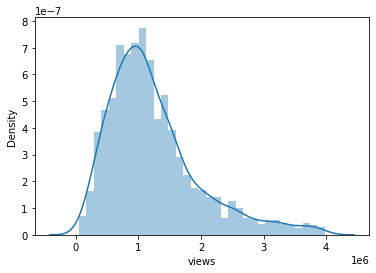

In [12]:
sns.distplot(df[df['views']<0.4e7]['views'])

In [13]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

# Comments

In [14]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

Observations:       
* On averge,there are 191.5 comments on every TED Talk.Assuming the comments are costructive crticisim,we can conclude that there are highly involved in duscusing revovolving TED Talk.    
* There is huge Standard Deviation associted with comments.**in fact it is more than mean suggesting that the measure may be sensitive to outliers**.we shall plot this to check the nature of the distribution

<AxesSubplot:xlabel='comments', ylabel='Density'>

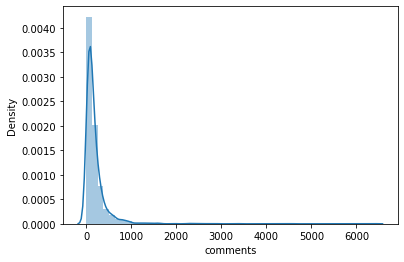

In [15]:
sns.distplot(df['comments'])

<AxesSubplot:xlabel='comments', ylabel='Density'>

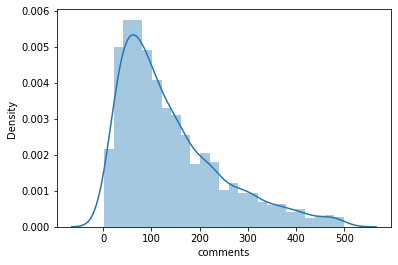

In [16]:
sns.distplot(df[df['comments']<500]['comments'])

Another question that i am interested in is if the no.of views is correlated with the no.of comments.we should think that this is the case as more popular videos tend to have more comments.Let us find out.

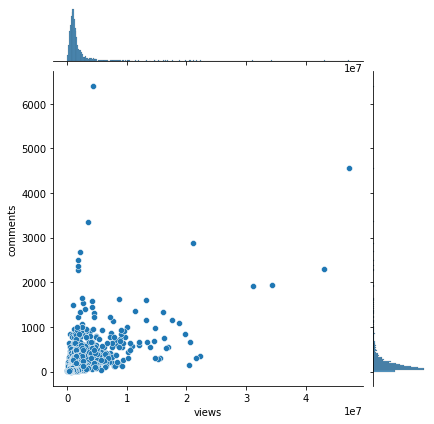

In [17]:
sns.jointplot(x='views',y='comments',data=df)

In [18]:
df[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


As the scatterplot and correlation matrix show,the pearson coefficient is slightly more than 0.5.This suggest that medium to strong correlation between two quantiles.

In [19]:
df[['title','main_speaker','views','comments']].sort_values('comments',ascending=False)[:15]

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


As can be seen above,Richard Dawkin's talk on Militant atheism generated the greatest amount of discussion qnd opinion despite having significantly lesser views than KEn Robinson's talk,which is second in the list.This rise some intreseting question.     
<!--  -->       
Which talk tend to attrack the largest amount of discussion?            
<!--  -->               
To answer this question,we will define a new feature Discussion Quotient which is simply the ratio of the no.of comments to the no.of views then check which talks=s have the largest discussion quotient.

In [20]:
df['dis_quo']=df['comments']/df['views']

In [21]:
df[['title','main_speaker','views','comments','dis_quo']].sort_values('dis_quo',ascending=False)[:15]

,title,main_speaker,views,comments,dis_quo
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220
803,E-voting without fraud,David Bismark,543551,834,0.001534
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236
661,The danger of science denial,Michael Specter,1838628,2272,0.001236
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235


* This analysis has actually raised extremely intresting insights.Half of the top 10 are on the lines of Faith and Religions.i suspect science and religion are still very hotly debated topic even in 21st century.

# Analysing TED Talks by month and the Year

In [22]:
df['month']=df['film_date'].apply(lambda x:month_order[int(x.split('-')[1])-1])

month_df=pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns=['month','talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

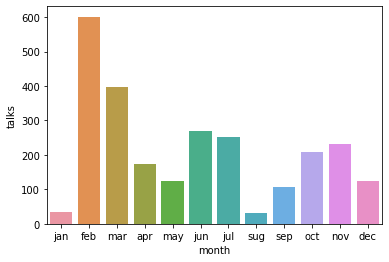

In [23]:
sns.barplot(x='month',y='talks',data=month_df,order=month_order)

February is clearly the most popular month for TED conference whereas August and January are the least popular.February's popularity is due to most TED conference are held in February.

In [24]:
df_x=df[df['event'].str.contains('TEDx')]
x_month=pd.DataFrame(df_x['month'].value_counts().reset_index())
x_month.columns=['month','talks']

<AxesSubplot:xlabel='month', ylabel='talks'>

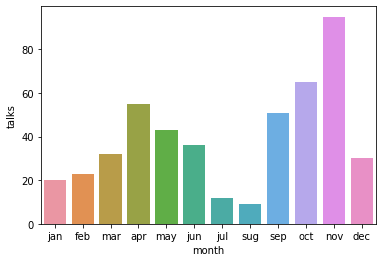

In [25]:
sns.barplot(x='month',y='talks',data=x_month,order=month_order)

As far as TED talks are concerned,November is the most popular month.However,we cannot take this result as face value as very few of the TEDx talks are actually uploaded to the TED website.                                
* The most popular TEDx talks are place in October and November.          
<!--  -->           

The next question i'm interseted in is the most popular days for conducting TED and TEDx conference.

In [26]:
def getday(x):
    day,month,year=(int(i) for i in x.split('-'))
    answer=datetime.date(year,month,day).weekday()
    return day_order[answer]


In [27]:
df['day']=df['film_date'].apply(getday)

In [28]:
day_df=pd.DataFrame(df['day'].value_counts()).reset_index()
day_df.columns=['day','talks']

<AxesSubplot:xlabel='day', ylabel='talks'>

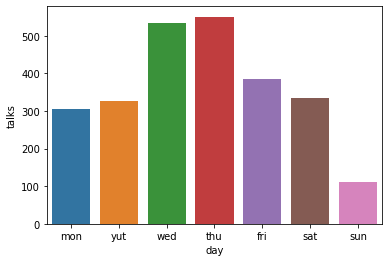

In [29]:
sns.barplot(x='day',y='talks',data=day_df,order=day_order)

The distribution of day is almost a bell shape with Wednesday and Thursday being the most popular day and sinday being the least popular.This is pretty intresting because i was of the opinion that most TED conference would happen sometime in weekend

In [30]:
df['year']=df['film_date'].apply(lambda x:x.split('-')[2])
year_df=pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns=['year','talks']

<AxesSubplot:xlabel='year', ylabel='talks'>

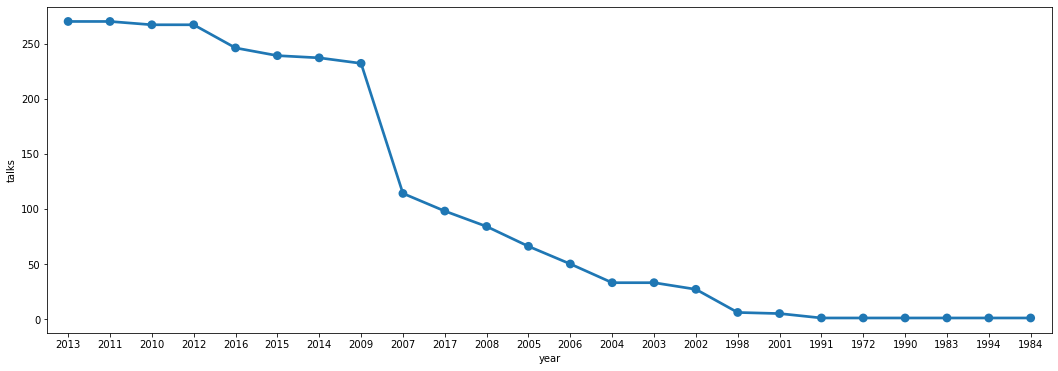

In [31]:
plt.figure(figsize=[18,6])
sns.pointplot(x='year',y='talks',data=year_df)

# TED Speakers

In [32]:
speaker_df=df.groupby('main_speaker').count().reset_index()[['main_speaker','comments']]
speaker_df.columns=['main_speaker','appearence']
speaker_df=speaker_df.sort_values('appearence',ascending=False)
speaker_df.head(10)

,main_speaker,appearence
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


Hans Rosling clearly the most popular TED speaker,with more than 9 appearance on the TED Forum.Juan Enriquez  a close second with 7 appearnce

In [33]:
occupation_df=df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation','comments']]
occupation_df.columns=['occupation','appearence']
occupation_df=occupation_df.sort_values('appearence',ascending=False)

<AxesSubplot:xlabel='occupation', ylabel='appearence'>

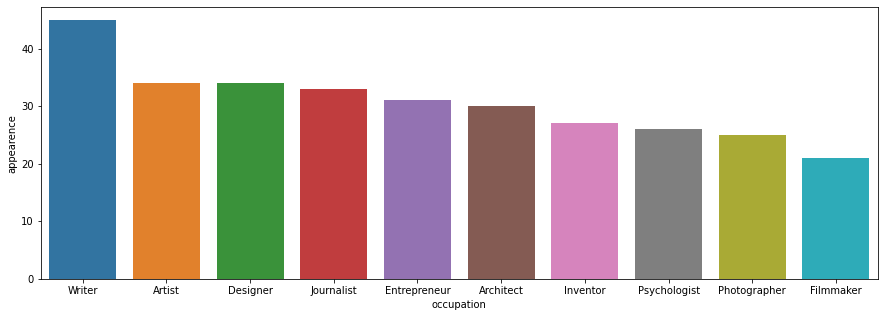

In [34]:
plt.figure(figsize=[15,5])
sns.barplot(x='occupation',y='appearence',data=occupation_df.head(10))

Observation:
* Writers are most popular with more than 45 speakers identifying themselves as the         
* Artist and Designers come a distant second with around 35 speakers in each category.         
<!--  -->           

Do some profession tend to attract a large no.of viwers? to answer this question let us visualize the top10 most popular professions and views.

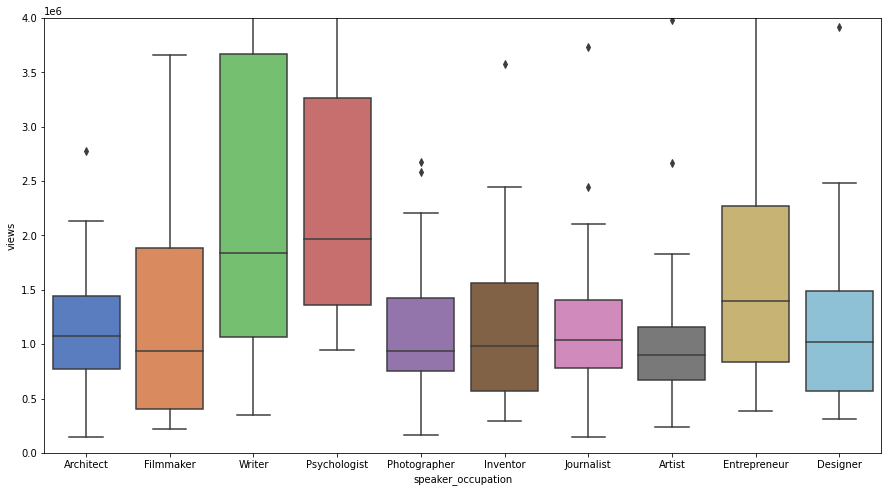

In [35]:
f,ax=plt.subplots(1,1,figsize=[15,8])
sns.boxplot(x='speaker_occupation',y='views',data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])],
            palette='muted',ax=ax)
ax.set_ylim([0,0.4e7])
plt.show()

# TED Events

In [36]:
events_df=df[['title','event']].groupby('event').count().reset_index()
events_df.columns=['event','talks']
events_df=events_df.sort_values("talks",ascending=False)
events_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


# TED Languages

In [37]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

On average,a TED talks is available in 27 languages.

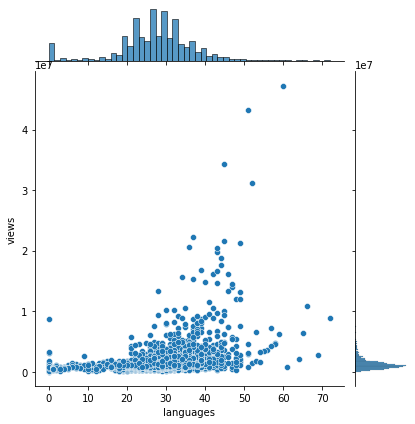

In [38]:
sns.jointplot(x='languages',y='views',data=df)


# TED Themes

In [39]:
import ast
df['tags']=df['tags'].apply(lambda x:ast.literal_eval(x))

In [40]:
df.head()

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,tags,languages,ratings,related_talks,url,views,dis_quo,month,day,year
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,"[children, creativity, culture, dance, educati...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,feb,sat,2006
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,25-02-2006,27-06-2006,...,"[alternative energy, cars, climate change, cul...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,feb,sat,2006
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,24-02-2006,27-06-2006,...,"[computers, entertainment, interface design, m...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,feb,fri,2006
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,26-02-2006,27-06-2006,...,"[MacArthur grant, activism, business, cities, ...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,feb,sun,2006
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,22-02-2006,28-06-2006,...,"[Africa, Asia, Google, demo, economics, global...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,feb,wed,2006


In [41]:
s=df.apply(lambda x:pd.Series(x['tags']),axis=1).stack().reset_index(level=1,drop=True)
s.name='theme'

In [42]:
theme_df=df.drop('tags',axis=1).join(s)
theme_df.head(3)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,...,languages,ratings,related_talks,url,views,dis_quo,month,day,year,theme
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,feb,sat,2006,children
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,feb,sat,2006,creativity
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,25-02-2006,27-06-2006,...,60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,feb,sat,2006,culture


In [43]:
popu_theme=pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
popu_theme.columns=['theme','talks']
popu_theme.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


<AxesSubplot:xlabel='theme', ylabel='talks'>

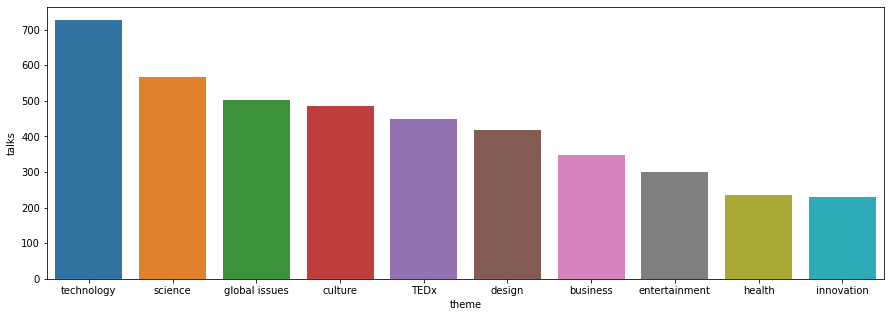

In [44]:
plt.figure(figsize=[15,5])
sns.barplot(x='theme',y='talks',data=popu_theme.head(10))


technology is the most popular topic fot talks.the other two original faction,Design and Enertainment,also make it to the list of top 10 theme.Science and Global Issues are the second and third most popular themes respectively.

# Talk Duration and Word Count

In [45]:
df['duration']=df['duration']/60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

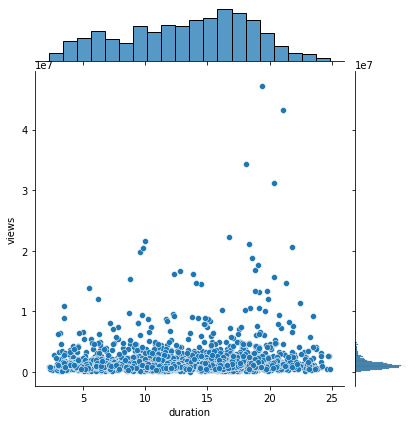

In [46]:
sns.jointplot(x='duration',y='views',data=df[df['duration']<25])